In [57]:
import scanpy as sc
import convexgating as cg
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

def get_f1_hierarch_max2hierarch(perf_loc):
    tab = pd.read_csv(perf_loc)
    #tab = pd.read_csv('level_' +str(level) + '/cluster_' + celltype + '/performance.csv')
    best_loc_f1 = np.argmax(tab.iloc[0][1:])
    if best_loc_f1 > 1:
        best_loc_f1 = 1
    f1 = tab.iloc[0][1:][best_loc_f1]
    recall = tab.iloc[1][1:][best_loc_f1]
    precision = tab.iloc[2][1:][best_loc_f1]
    hierarchy = best_loc_f1 + 1
    return f1,recall,precision,hierarchy

In [58]:
file_path = '/work/users/mh823zote/projects/gating/data/CITEseq_Covid/' 
data_dir = file_path + 'data/' 
data_raw_dir = file_path + 'input/' 
gating_dir = file_path + '04_run_gating'

In [59]:
denoised_panel = ['denoised', 'denoised_georg_panel', 'denoised_minimal_panel']
raw_panel = ['raw', 'raw_georg_panel', 'raw_minimal_panel']
cts = ['04_cluster_CD16+ CD4+ T cell','04_cluster_CD16+ CD8+ T cell'] 

In [60]:
dp_list = []
ct_list = []
f1_list = []
recall_list = []
precision_list = []
hierarchy_list = []
for dp in denoised_panel:
    for ct in cts:
        perf_loc = gating_dir + '/04_run_gating_' + dp + '/' + ct + '/performance.csv'
        f1,recall,precision,hierarchy = get_f1_hierarch_max2hierarch(perf_loc)
        dp_list.append(dp)
        ct_list.append(ct)
        f1_list.append(f1)
        recall_list.append(recall)
        precision_list.append(precision)
        hierarchy_list.append(hierarchy)
for dp in raw_panel:
    for ct in cts:
        perf_loc = gating_dir + '/04_run_gating_' + dp + '/' + ct + '/performance.csv'
        f1,recall,precision,hierarchy = get_f1_hierarch_max2hierarch(perf_loc)
        dp_list.append(dp)
        ct_list.append(ct)
        f1_list.append(f1)
        recall_list.append(recall)
        precision_list.append(precision)
        hierarchy_list.append(hierarchy)
        

In [61]:
data ={'f1':f1_list,'recall':recall_list,'precision':precision_list, 'ct' : ct_list, 'dp': dp_list}
df =pd.DataFrame(data)

In [62]:
df_CD4 = df[df['ct'] == '04_cluster_CD16+ CD4+ T cell']
df_CD8 = df[df['ct'] == '04_cluster_CD16+ CD8+ T cell']

In [63]:
df_CD4_melted = pd.melt(df_CD4[['f1','recall','precision','dp']], id_vars="dp", var_name="metric", value_name="score")

In [64]:
df_CD8_melted = pd.melt(df_CD8[['f1','recall','precision','dp']], id_vars="dp", var_name="metric", value_name="score")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'denoised'),
  Text(1, 0, 'denoised_georg_panel'),
  Text(2, 0, 'denoised_minimal_panel'),
  Text(3, 0, 'raw'),
  Text(4, 0, 'raw_georg_panel'),
  Text(5, 0, 'raw_minimal_panel')])

<Figure size 432x288 with 0 Axes>

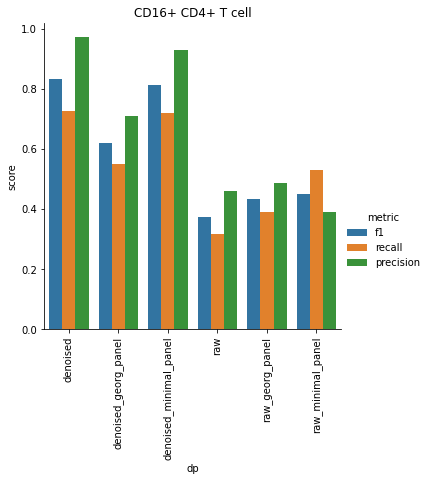

In [65]:
plt.figure()
sns.factorplot(x='dp', y="score", hue="metric", data=df_CD4_melted, kind='bar')
plt.title('CD16+ CD4+ T cell')
plt.xticks(rotation=90)
#plt.savefig('05_CD16_CD4_scores.pdf',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

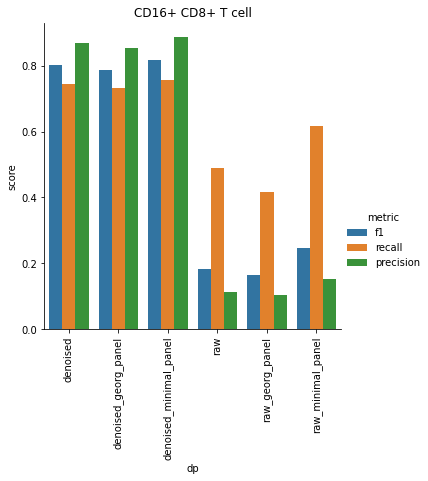

In [12]:
plt.figure()
sns.factorplot(x='dp', y="score", hue="metric", data=df_CD8_melted, kind='bar')
plt.title('CD16+ CD8+ T cell')
plt.xticks(rotation=90)
plt.savefig('05_CD16_CD8_scores.pdf',bbox_inches='tight')

# No georg panel

In [13]:
denoised_panel = ['denoised', 'denoised_minimal_panel']
raw_panel = ['raw', 'raw_minimal_panel']
cts = ['04_cluster_CD16+ CD4+ T cell','04_cluster_CD16+ CD8+ T cell'] 

In [14]:
dp_list = []
ct_list = []
f1_list = []
recall_list = []
precision_list = []
hierarchy_list = []
for dp in denoised_panel:
    for ct in cts:
        perf_loc = gating_dir + '/04_run_gating_' + dp + '/' + ct + '/performance.csv'
        f1,recall,precision,hierarchy = get_f1_hierarch_max2hierarch(perf_loc)
        dp_list.append(dp)
        ct_list.append(ct)
        f1_list.append(f1)
        recall_list.append(recall)
        precision_list.append(precision)
        hierarchy_list.append(hierarchy)
for dp in raw_panel:
    for ct in cts:
        perf_loc = gating_dir + '/04_run_gating_' + dp + '/' + ct + '/performance.csv'
        f1,recall,precision,hierarchy = get_f1_hierarch_max2hierarch(perf_loc)
        dp_list.append(dp)
        ct_list.append(ct)
        f1_list.append(f1)
        recall_list.append(recall)
        precision_list.append(precision)
        hierarchy_list.append(hierarchy)
        

In [15]:
data ={'f1':f1_list,'recall':recall_list,'precision':precision_list, 'ct' : ct_list, 'dp': dp_list}
df =pd.DataFrame(data)
df_CD4 = df[df['ct'] == '04_cluster_CD16+ CD4+ T cell']
df_CD8 = df[df['ct'] == '04_cluster_CD16+ CD8+ T cell']
df_CD4_melted = pd.melt(df_CD4[['f1','recall','precision','dp']], id_vars="dp", var_name="metric", value_name="score")
df_CD8_melted = pd.melt(df_CD8[['f1','recall','precision','dp']], id_vars="dp", var_name="metric", value_name="score")

<Figure size 432x288 with 0 Axes>

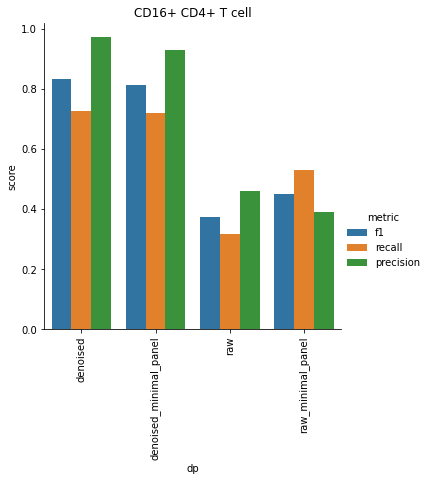

In [16]:
plt.figure()
sns.factorplot(x='dp', y="score", hue="metric", data=df_CD4_melted, kind='bar')
plt.title('CD16+ CD4+ T cell')
plt.xticks(rotation=90)
plt.savefig('05_CD16_CD4_scores_compact.pdf',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

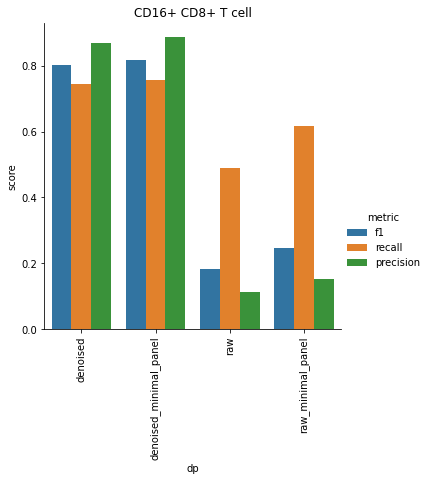

In [17]:
plt.figure()
sns.factorplot(x='dp', y="score", hue="metric", data=df_CD8_melted, kind='bar')
plt.title('CD16+ CD8+ T cell')
plt.xticks(rotation=90)
plt.savefig('05_CD16_CD8_scores_compact.pdf',bbox_inches='tight')

# Only denoised

## full panel 

In [46]:
denoised_panel = ['denoised']

In [47]:
cts = ['04_cluster_CD16+ CD4+ T cell','04_cluster_CD16+ CD8+ T cell'] 

In [48]:
#dp_list = []
ct_list = []
f1_list = []
recall_list = []
precision_list = []
hierarchy_list = []
for dp in denoised_panel:
    for ct in cts:
        perf_loc = gating_dir + '/04_run_gating_' + dp + '/' + ct + '/performance.csv'
        f1,recall,precision,hierarchy = get_f1_hierarch_max2hierarch(perf_loc)
        #dp_list.append(dp)
        ct_list.append(ct)
        f1_list.append(f1)
        recall_list.append(recall)
        precision_list.append(precision)
        hierarchy_list.append(hierarchy)


In [49]:
data ={'f1':f1_list,'recall':recall_list,'precision':precision_list, 'ct' : ct_list}
df =pd.DataFrame(data)
df = df.replace('04_cluster_CD16+ CD4+ T cell','CD16+ CD4+ T cell')
df = df.replace('04_cluster_CD16+ CD8+ T cell','CD16+ CD8+ T cell')

In [50]:
df_melted = pd.melt(df[['f1','recall','precision','ct']], id_vars="ct", var_name="metric", value_name="score")

<Figure size 432x288 with 0 Axes>

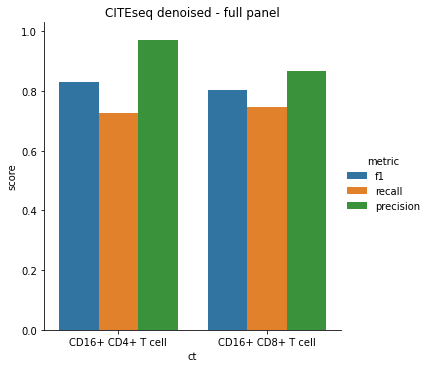

In [51]:
plt.figure()
sns.factorplot(x='ct', y="score", hue="metric", data=df_melted, kind='bar')
plt.title('CITEseq denoised - full panel')
plt.ylim([0,1.03])
#plt.xticks(rotation=90)
plt.savefig('05_denoised_full_panel.pdf',bbox_inches='tight')

In [42]:
data

{'f1': [0.83166, 0.80224],
 'recall': [0.727273, 0.745396],
 'precision': [0.971034, 0.86847],
 'ct': ['04_cluster_CD16+ CD4+ T cell', '04_cluster_CD16+ CD8+ T cell']}

## minimal panel

In [52]:
denoised_panel = ['denoised_minimal_panel']
cts = ['04_cluster_CD16+ CD4+ T cell','04_cluster_CD16+ CD8+ T cell'] 
#dp_list = []
ct_list = []
f1_list = []
recall_list = []
precision_list = []
hierarchy_list = []
for dp in denoised_panel:
    for ct in cts:
        perf_loc = gating_dir + '/04_run_gating_' + dp + '/' + ct + '/performance.csv'
        f1,recall,precision,hierarchy = get_f1_hierarch_max2hierarch(perf_loc)
        #dp_list.append(dp)
        ct_list.append(ct)
        f1_list.append(f1)
        recall_list.append(recall)
        precision_list.append(precision)
        hierarchy_list.append(hierarchy)
data ={'f1':f1_list,'recall':recall_list,'precision':precision_list, 'ct' : ct_list}
df =pd.DataFrame(data)
df = df.replace('04_cluster_CD16+ CD4+ T cell','CD16+ CD4+ T cell')
df = df.replace('04_cluster_CD16+ CD8+ T cell','CD16+ CD8+ T cell')
df_melted = pd.melt(df[['f1','recall','precision','ct']], id_vars="ct", var_name="metric", value_name="score")

<Figure size 432x288 with 0 Axes>

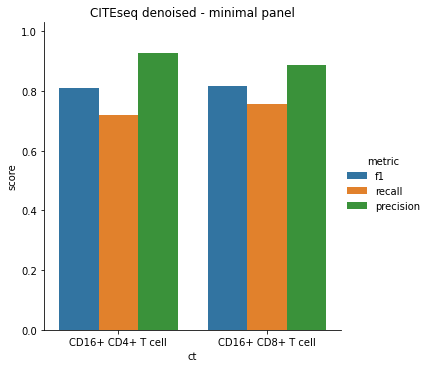

In [54]:
plt.figure()
sns.factorplot(x='ct', y="score", hue="metric", data=df_melted, kind='bar')
plt.title('CITEseq denoised - minimal panel')
plt.ylim([0,1.03])
#plt.xticks(rotation=90)
plt.savefig('05_denoised_minimal_panel.pdf',bbox_inches='tight')

## georg panel

In [55]:
denoised_panel = ['denoised_georg_panel']
cts = ['04_cluster_CD16+ CD4+ T cell','04_cluster_CD16+ CD8+ T cell'] 
#dp_list = []
ct_list = []
f1_list = []
recall_list = []
precision_list = []
hierarchy_list = []
for dp in denoised_panel:
    for ct in cts:
        perf_loc = gating_dir + '/04_run_gating_' + dp + '/' + ct + '/performance.csv'
        f1,recall,precision,hierarchy = get_f1_hierarch_max2hierarch(perf_loc)
        #dp_list.append(dp)
        ct_list.append(ct)
        f1_list.append(f1)
        recall_list.append(recall)
        precision_list.append(precision)
        hierarchy_list.append(hierarchy)
data ={'f1':f1_list,'recall':recall_list,'precision':precision_list, 'ct' : ct_list}
df =pd.DataFrame(data)
df = df.replace('04_cluster_CD16+ CD4+ T cell','CD16+ CD4+ T cell')
df = df.replace('04_cluster_CD16+ CD8+ T cell','CD16+ CD8+ T cell')
df_melted = pd.melt(df[['f1','recall','precision','ct']], id_vars="ct", var_name="metric", value_name="score")

<Figure size 432x288 with 0 Axes>

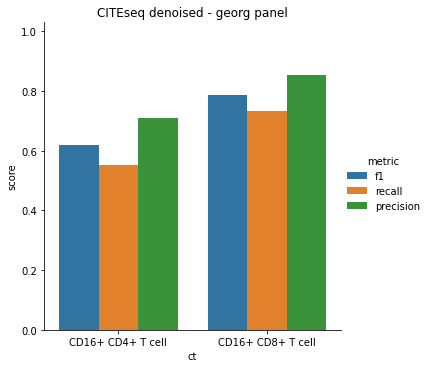

In [56]:
plt.figure()
sns.factorplot(x='ct', y="score", hue="metric", data=df_melted, kind='bar')
plt.title('CITEseq denoised - georg panel')
plt.ylim([0,1.03])
#plt.xticks(rotation=90)
plt.savefig('05_denoised_georg_panel.pdf',bbox_inches='tight')